<a href="https://colab.research.google.com/github/piyush1856/maths-for-machine-learning/blob/main/gradient_descent_in_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## **Gradient Field**

In [10]:
def get_partials(func, x ,y):
  delta = 0.0001
  fx = (func(x + delta, y)- func(x, y)) / delta
  fy = (func(x, y + delta) - func(x, y)) / delta
  return fx, fy

In [11]:
func = lambda x,y: x**2 + y**2

In [12]:
get_partials(func, 3, 4)
# pointing toward the highest increase of the function

(6.000099999994291, 8.00009999998963)

In [15]:
def get_grid(axis_lim):
  x = np.linspace(-axis_lim, axis_lim, 20)
  y = np.linspace(-axis_lim, axis_lim, 20)
  g1, g2 = np.meshgrid(x, y)
  return g1, g2

In [16]:
g1, g2 = get_grid(10)

In [17]:
def get_partials_for_grid(func, g1, g2):
  U = np.zeros(g1.shape) # df/dx
  V = np.zeros(g1.shape) # df/dy

  for row_id,(row_x, row_y) in enumerate(zip(g1, g2)):
    for col_id, (x, y) in enumerate(zip(row_x, row_y)):
      fx, fy = get_partials(func, x, y)
      U[row_id, col_id] = fx
      V[row_id, col_id] = fy
  return U, V


In [18]:
U, V = get_partials_for_grid(func, g1, g2)

In [21]:
def plot_gradient_field(g1, g2, U, V):
  fig, ax = plt.subplots()
  q = ax.quiver(g1, g2, U, V)
  plt.show()

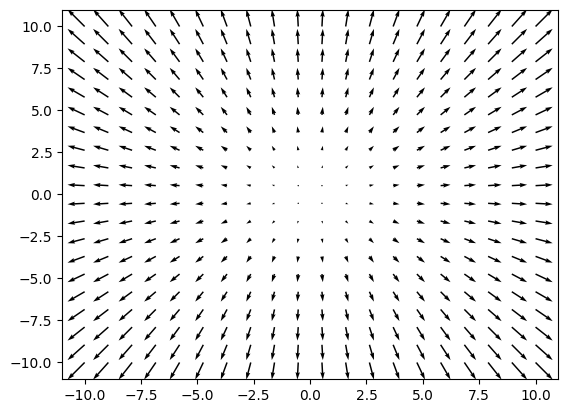

In [22]:
plot_gradient_field(g1, g2, U, V)
# pointing to the direction of maximum increase
# to move toward the minima take negative of derivatives(fx, fy) in get_partials_for_grid function

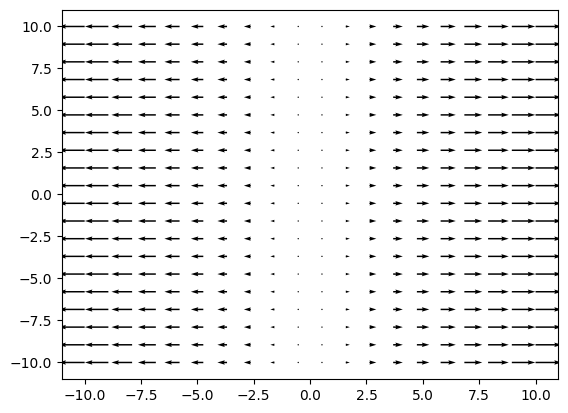

In [23]:
func = lambda x,y: 10*x**2
U, V = get_partials_for_grid(func, g1, g2)
plot_gradient_field(g1, g2, U, V)